In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\USER\AppData\Local\Temp\ipykernel_61808\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [21]:
# خواندن داده‌ها از فایل‌های CSV
d1 = pd.read_csv("C:/Users/USER/Documents/student/student-mat.csv", sep=';')
d2 = pd.read_csv("C:/Users/USER/Documents/student/student-por.csv", sep=';')

# ادغام دو دیتافریم بر اساس ستون‌های مشترک
common_columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
df = pd.merge(d1, d2, on=common_columns)

# چاپ تعداد سطرهای دیتافریم ادغام شده
print(len(df))  # 382 students

0


In [18]:
df1.columns == df2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [22]:
df = pd.concat([df1, df2], ignore_index = True)

In [23]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


1. شناسایی Missing values

In [24]:
df.isnull().sum().sort_values()

school        0
G1            0
absences      0
health        0
Walc          0
Dalc          0
goout         0
freetime      0
famrel        0
romantic      0
internet      0
higher        0
nursery       0
activities    0
paid          0
G2            0
famsup        0
failures      0
studytime     0
traveltime    0
guardian      0
reason        0
Fjob          0
Mjob          0
Fedu          0
Medu          0
Pstatus       0
famsize       0
address       0
age           0
sex           0
schoolsup     0
G3            0
dtype: int64

2. شناسایی مقادیر اشتباه

In [25]:
df['sex'].value_counts()

sex
F    591
M    453
Name: count, dtype: int64

In [26]:
df['school'].value_counts()

school
GP    772
MS    272
Name: count, dtype: int64

In [27]:
df['Pstatus'].value_counts()

Pstatus
T    923
A    121
Name: count, dtype: int64

In [28]:
df['Mjob'].value_counts()

Mjob
other       399
services    239
at_home     194
teacher     130
health       82
Name: count, dtype: int64

In [29]:
df['Fjob'].value_counts()

Fjob
other       584
services    292
teacher      65
at_home      62
health       41
Name: count, dtype: int64

3. عددی کردن داده های متنی

In [30]:
from sklearn.preprocessing import LabelEncoder

In [32]:
label_encoders = {}
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 
                       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [33]:
label_encoders

{'school': LabelEncoder(),
 'sex': LabelEncoder(),
 'address': LabelEncoder(),
 'famsize': LabelEncoder(),
 'Pstatus': LabelEncoder(),
 'Mjob': LabelEncoder(),
 'Fjob': LabelEncoder(),
 'reason': LabelEncoder(),
 'guardian': LabelEncoder(),
 'schoolsup': LabelEncoder(),
 'famsup': LabelEncoder(),
 'paid': LabelEncoder(),
 'activities': LabelEncoder(),
 'nursery': LabelEncoder(),
 'higher': LabelEncoder(),
 'internet': LabelEncoder(),
 'romantic': LabelEncoder()}

In [34]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [35]:
df[['G1', 'G2', 'G3']].describe()

,G1,G2,G3
count,1044.000000,1044.000000,1044.000000
mean,11.213602,11.246169,11.341954
std,2.983394,3.285071,3.864796
min,0.000000,0.000000,0.000000
25%,9.000000,9.000000,10.000000
50%,11.000000,11.000000,11.000000
75%,13.000000,13.000000,14.000000
max,19.000000,19.000000,20.000000


4. همبستگی بین ویژگی ها


    مقادیر نزدیک به 1 (سلول‌هایی با رنگ قرمز پررنگ) نشان‌دهنده همبستگی مثبت قوی بین دو متغیر هستند.
    مثلاً متغیرهایی که ممکن است به یکدیگر وابسته باشند یا رابطه مستقیمی داشته باشند.
    رابطه قوی منفی:

    مقادیر نزدیک به -1 (رنگ آبی پررنگ) نشان‌دهنده همبستگی منفی قوی هستند. این بدان معناست که با افزایش یکی، دیگری کاهش می‌یابد.
    رابطه‌های کم‌اهمیت یا ضعیف:

    مقادیر نزدیک به 0 نشان‌دهنده عدم وجود رابطه قوی بین دو متغیر است.
    رابطه متغیر با خودش:
    
    سلول‌های روی قطر اصلی (از بالا سمت چپ به پایین سمت راست) همیشه مقدار 1 دارند، زیرا هر متغیر با خودش کاملاً همبستگی دارد.

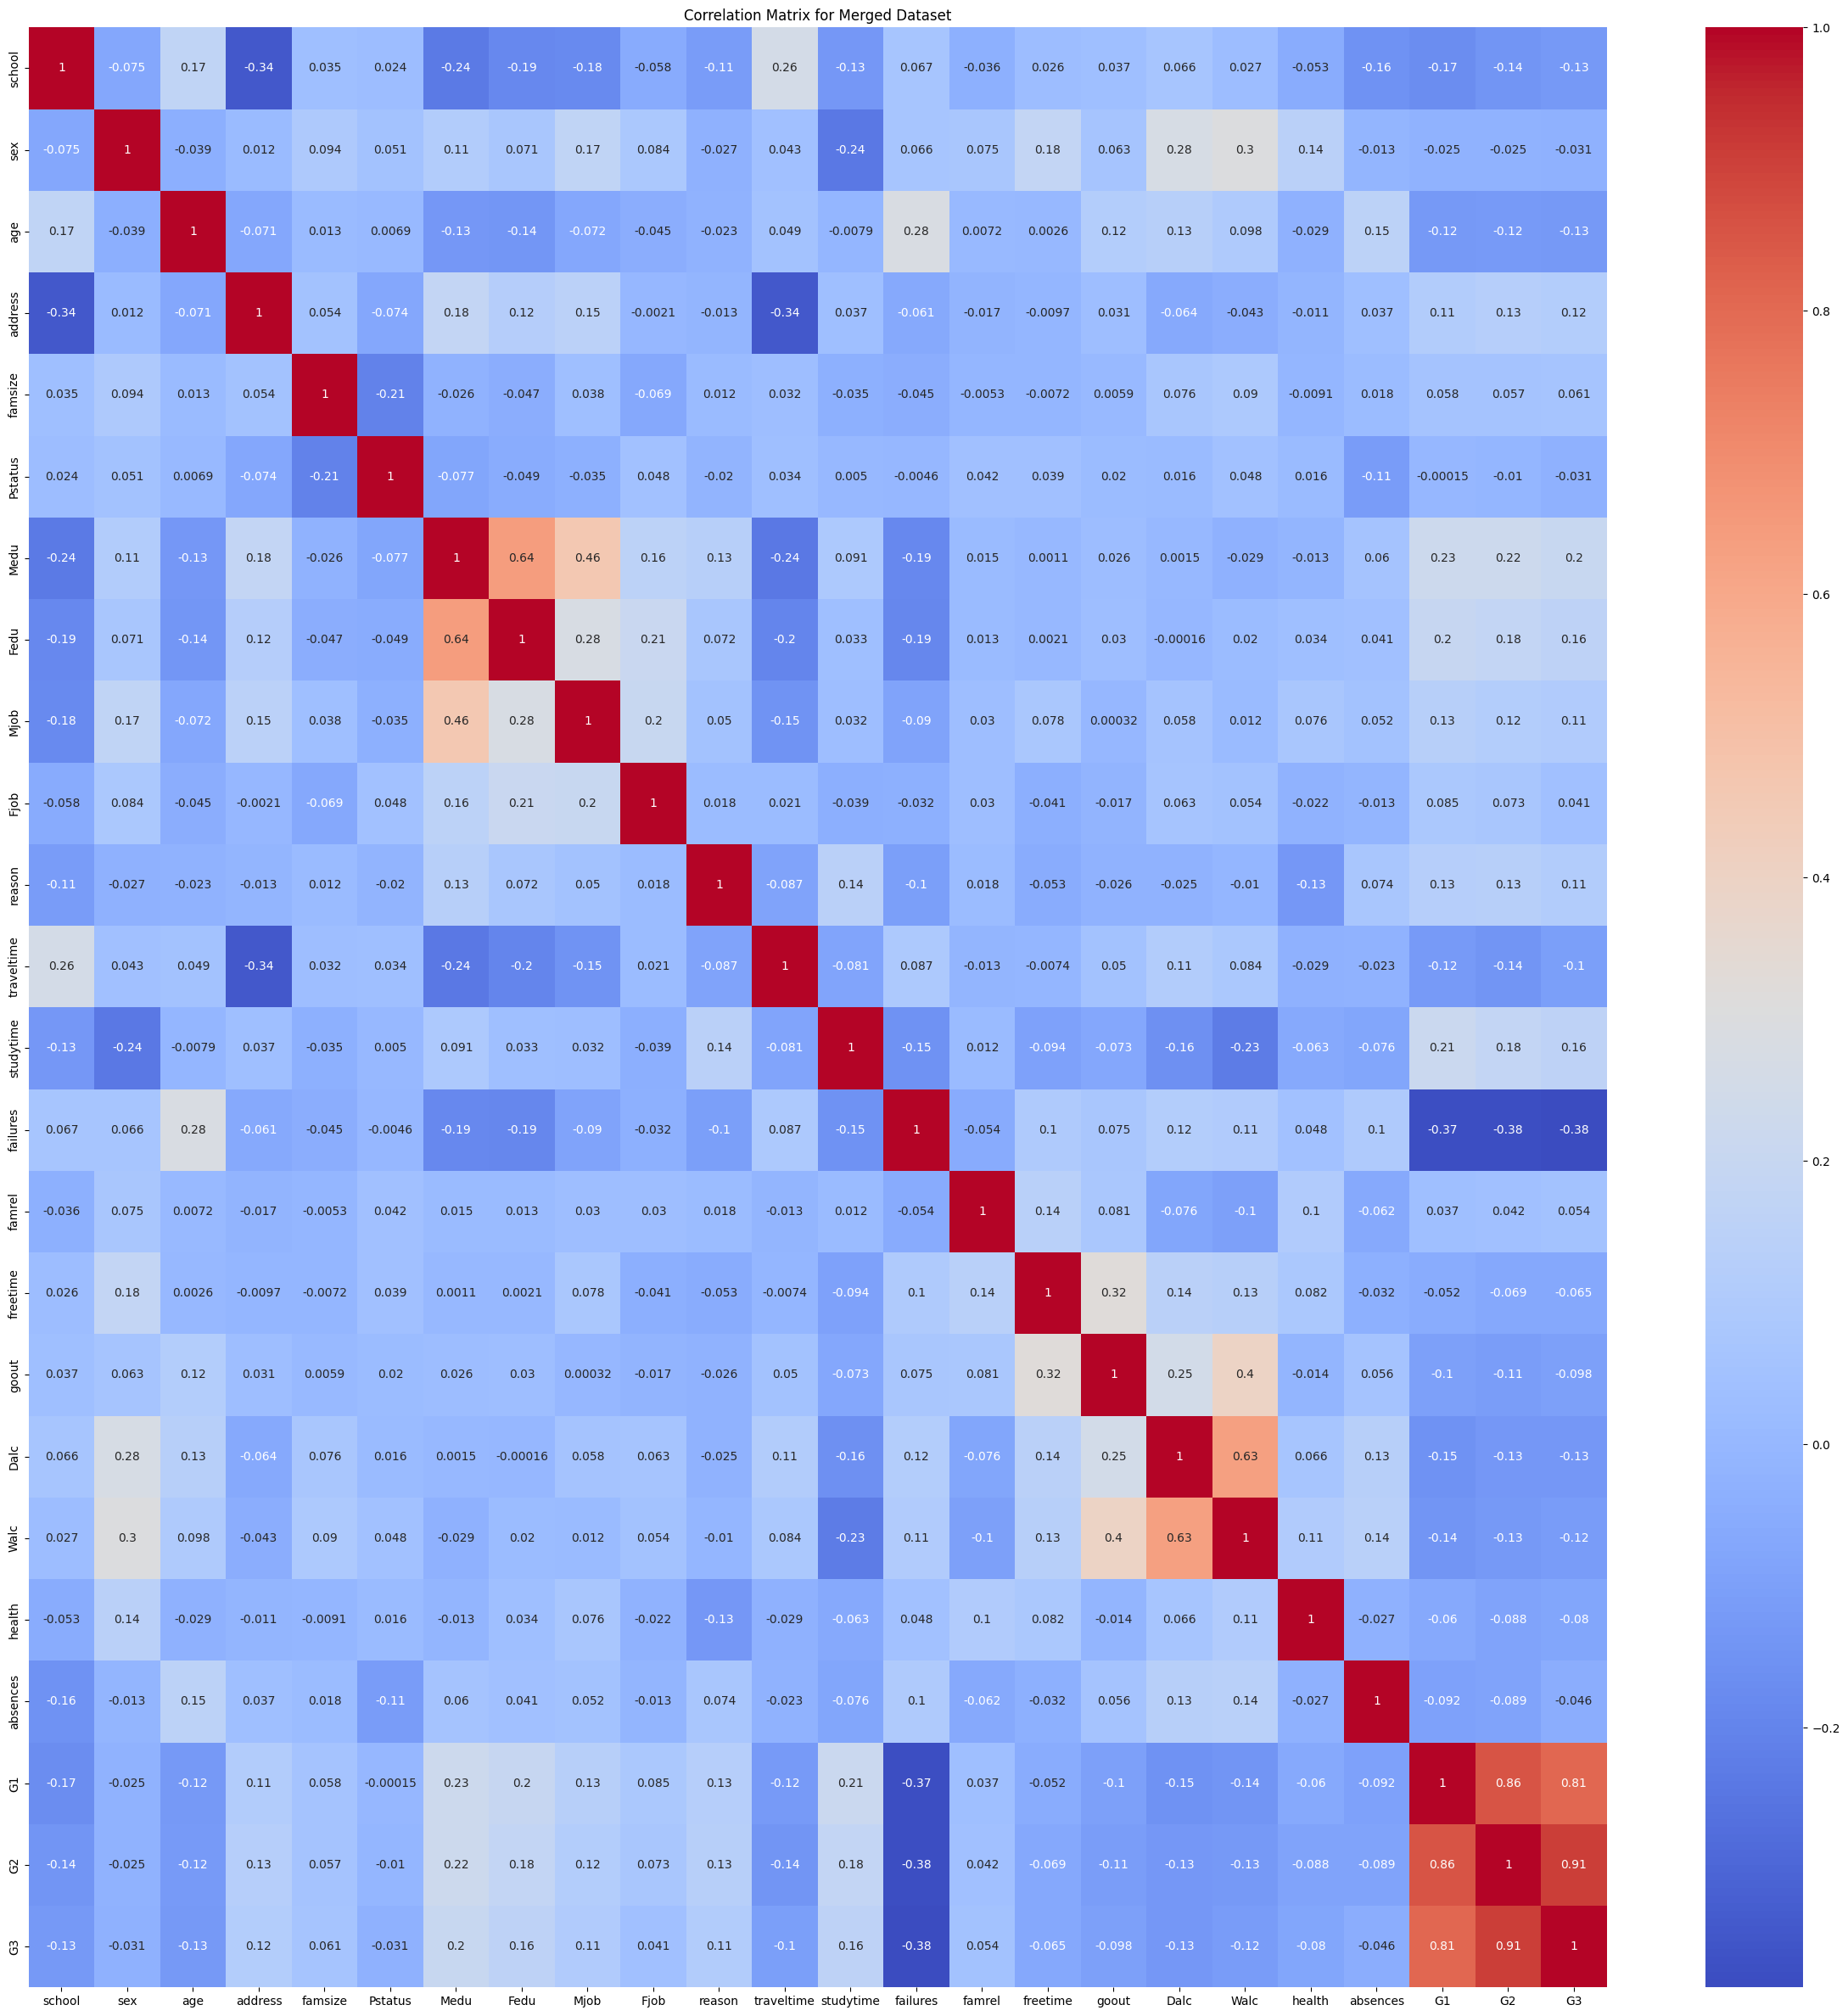

In [36]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# رسم نقشه حرارتی
plt.figure(figsize=(30, 30))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Merged Dataset')
plt.show()

In [37]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [38]:
X = df.drop(columns=['G1','G2','G3'])
y = df['G3']

In [39]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly,y,test_size=0.2,random_state=42)

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [42]:
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [45]:
print('RMSE: ',np.sqrt(mse))
print('r2 Score: ',r2)

RMSE:  5.446770013834881
r2 Score:  -0.9188702170089675


In [46]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [47]:
y_pred_dt = dt_model.predict(X_test)

In [48]:
mse_dt = mean_squared_error(y_test,y_pred_dt)
r2_dt = r2_score(y_test,y_pred_dt)

In [49]:
print('RMSE: ',np.sqrt(mse_dt))
print('r2 Score: ',r2_dt)

RMSE:  4.635261150465457
r2 Score:  -0.38968362789926303


# Conclusion

    رگرسیون درخت تصمیم عملکرد بهتری نسبت به رگرسیون چند جمله ای داشت

    1. تحلیل MSE (میانگین مربع خطا)
        رگرسیون چندجمله‌ای: MSE = 5.45
        درخت تصمیم: MSE = 4.63
        توضیح:
            MSE نشان می‌دهد که به طور میانگین، میزان انحراف پیش‌بینی‌های مدل از مقادیر واقعی چقدر است. مقدار کمتر بهتر است، زیرا نشان‌دهنده دقت بالاتر مدل است.
            ✅ در اینجا، مدل درخت تصمیم عملکرد بهتری دارد زیرا MSE کمتری دارد (4.63 در مقایسه با 5.45)، که به این معناست که پیش‌بینی‌های آن به مقدار واقعی نزدیک‌تر هستند.

    2. تحلیل R² Score (ضریب تعیین):
        رگرسیون چندجمله‌ای: R² = -0.92
        درخت تصمیم: R² = -0.39
        توضیح:
            R² معیاری برای سنجش میزان توضیح‌دهندگی مدل است. مقدار R² بین 0 و 1 است و هرچه به 1 نزدیک‌تر باشد، مدل عملکرد بهتری دارد.
            ❌ مقدار منفی R² نشان می‌دهد که مدل حتی بدتر از یک مدل ساده‌ی میانگین‌گیری ثابت عمل کرده است.
            ✅ در اینجا، درخت تصمیم عملکرد بهتری دارد زیرا R² = -0.39 نسبت به -0.92 مقدار بهتری است. مدل رگرسیون چندجمله‌ای توضیح‌دهندگی بسیار ضعیفی داشته و عملاً بدتر از یک پیش‌بینی تصادفی است.

    3. تحلیل کلی و انتخاب مدل بهتر
        بر اساس هر دو معیار (MSE و R² Score)، مدل درخت تصمیم عملکرد بهتری دارد:

        مقدار MSE کمتر است (خطای کمتر). 
        مقدار R² بهتر است (مدل توضیح‌دهنده‌تر است).
        بنابراین، مدل درخت تصمیم انتخاب بهتری برای این داده‌ها است و اگر قصد بهبود مدل دارید، می‌توانید:

            هایپرتیونینگ (max_depth, min_samples_split, min_samples_leaf) برای درخت تصمیم انجام دهید.
            از مدل‌های پیشرفته‌تر مانند Random Forest یا Gradient Boosting استفاده کنید.
            بررسی کنید که آیا ویژگی‌های ورودی نیاز به پردازش و اصلاح دارند.